In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from keras import layers, Input, Model, backend
import matplotlib.pyplot as plt
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train[:2000]
n_input = np.prod(x_train.shape[1:])

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32').reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.astype('float32').reshape(x_test.shape[0], 28, 28, 1)
x_train /= np.max(x_train)
x_test /= np.max(x_test)
input = layers.Input(shape=(28, 28, 1))

out = layers.Conv2D(128, 3, input_shape=(28, 28, 1), activation='relu', padding='same')(input)
out = layers.MaxPooling2D()(out)
out = layers.Conv2D(64, 3, activation='relu', padding='same')(out)
out = layers.MaxPooling2D()(out)

out = layers.Conv2D(64, 3, activation='relu', padding='same')(out)
out = layers.UpSampling2D()(out)
out = layers.Conv2D(128, 3, activation='relu', padding='same')(out)
out = layers.UpSampling2D()(out)
out = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(out)

model = Model(input, out)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
model.evaluate(x_test,  x_test, verbose=2)

Epoch 1/10
16/16 [==============================] - 46s 3s/step - loss: 0.5292 - val_loss: 0.4589
Epoch 2/10
16/16 [==============================] - 46s 3s/step - loss: 0.3759 - val_loss: 0.3515
Epoch 3/10
16/16 [==============================] - 45s 3s/step - loss: 0.3308 - val_loss: 0.3270
Epoch 4/10
16/16 [==============================] - 64s 4s/step - loss: 0.3148 - val_loss: 0.3149
Epoch 5/10
16/16 [==============================] - 47s 3s/step - loss: 0.3035 - val_loss: 0.3051
Epoch 6/10
16/16 [==============================] - 44s 3s/step - loss: 0.2950 - val_loss: 0.2983
Epoch 7/10
16/16 [==============================] - 46s 3s/step - loss: 0.2893 - val_loss: 0.2934
Epoch 8/10
16/16 [==============================] - 45s 3s/step - loss: 0.2853 - val_loss: 0.2897
Epoch 9/10
16/16 [==============================] - 64s 4s/step - loss: 0.2822 - val_loss: 0.2879
Epoch 10/10
16/16 [==============================] - 48s 3s/step - loss: 0.2802 - val_loss: 0.2852
313/313 - 21s - los

0.28523802757263184

313/313 [==============================] - 23s 73ms/step


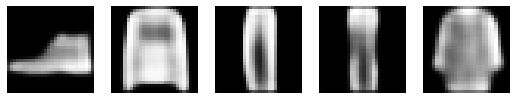

In [7]:
reconstructed_images = model.predict(x_test)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [2]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(x_train.shape[0], n_input)
x_test = x_test.reshape(x_test.shape[0], n_input)

input_img = Input(shape=(n_input,))

In [4]:
encode_layer1 = layers.Dense(256, activation='relu')(input_img)
encode_layer2 = layers.Dense(128, activation='relu')(encode_layer1)
latent_view = layers.Dense(64, activation='relu')(encode_layer2)
decode_layer1 = layers.Dense(128, activation='relu')(latent_view)
decode_layer2 = layers.Dense(256, activation='relu')(decode_layer1)
output_layer = layers.Dense(n_input, activation='sigmoid')(decode_layer2)

model = Model(input_img, output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
model.evaluate(x_test,  x_test, verbose=2)

Epoch 1/10
16/16 [==============================] - 2s 59ms/step - loss: 0.5900 - val_loss: 0.4845
Epoch 2/10
16/16 [==============================] - 1s 47ms/step - loss: 0.4403 - val_loss: 0.4139
Epoch 3/10
16/16 [==============================] - 1s 59ms/step - loss: 0.3914 - val_loss: 0.3863
Epoch 4/10
16/16 [==============================] - 1s 49ms/step - loss: 0.3694 - val_loss: 0.3679
Epoch 5/10
16/16 [==============================] - 1s 50ms/step - loss: 0.3544 - val_loss: 0.3549
Epoch 6/10
16/16 [==============================] - 1s 58ms/step - loss: 0.3426 - val_loss: 0.3451
Epoch 7/10
16/16 [==============================] - 1s 58ms/step - loss: 0.3346 - val_loss: 0.3395
Epoch 8/10
16/16 [==============================] - 2s 112ms/step - loss: 0.3266 - val_loss: 0.3329
Epoch 9/10
16/16 [==============================] - 1s 86ms/step - loss: 0.3214 - val_loss: 0.3297
Epoch 10/10
16/16 [==============================] - 1s 73ms/step - loss: 0.3176 - val_loss: 0.3244
313/313 

0.3244273066520691

313/313 [==============================] - 1s 3ms/step


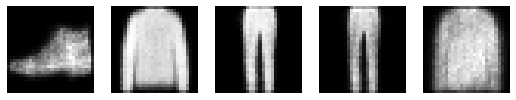

In [5]:
reconstructed_images = model.predict(x_test)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()